Programming Assignment 2
Nearest Neighbor Classifier (KNN) :

                                  Kauhsik Budur
                                  Mymav ID: 1002224112


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
from google.colab import files
uploaded = files.upload()

data = pd.read_csv('dataset_KNN.csv')


# Display the first few rows of the dataset
print(data.head())


Saving dataset_KNN.csv to dataset_KNN.csv
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


If we try to also do data pre processing mainly outlier detection and replacing NaN values with Median or Mode ,as Insulin column had only 186 unique values we get maximum values as median or mean if we choose to imutate the values, hence it is better to either drop th insulin column or not perfrom correlation with respect or Insulin column.

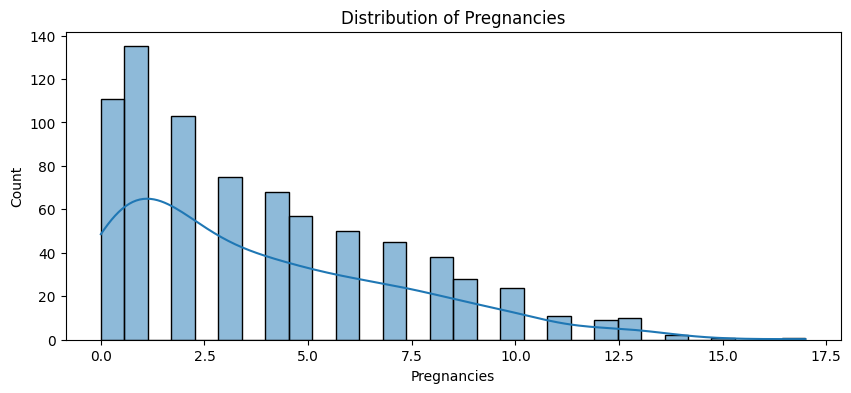

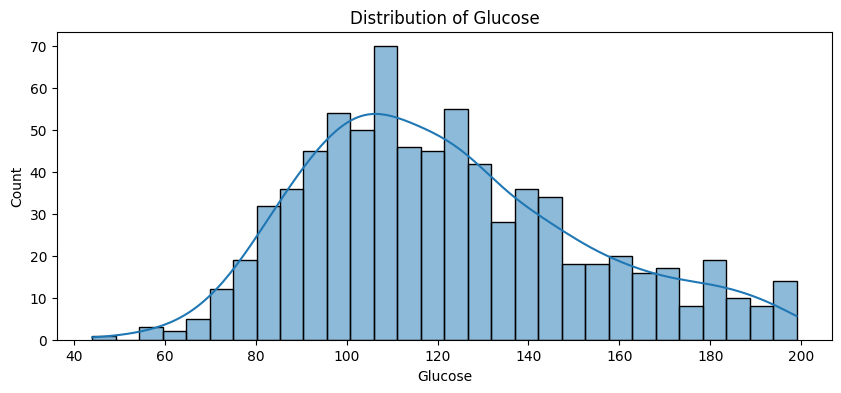

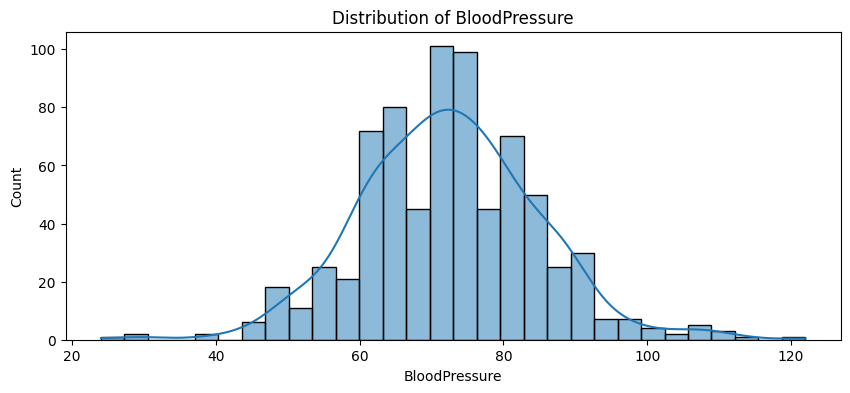

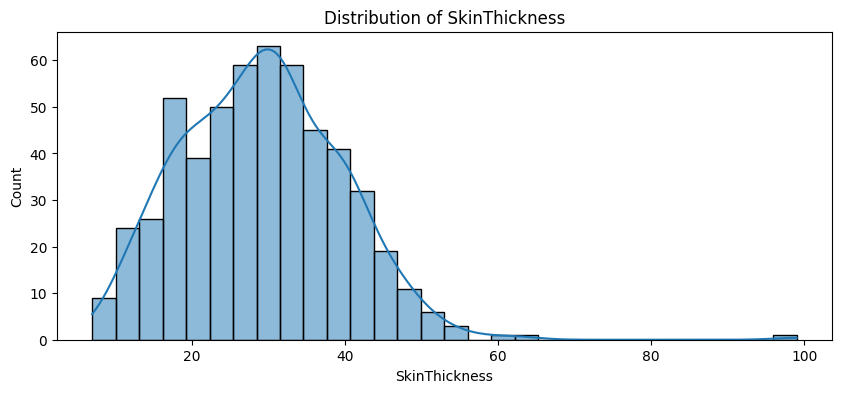

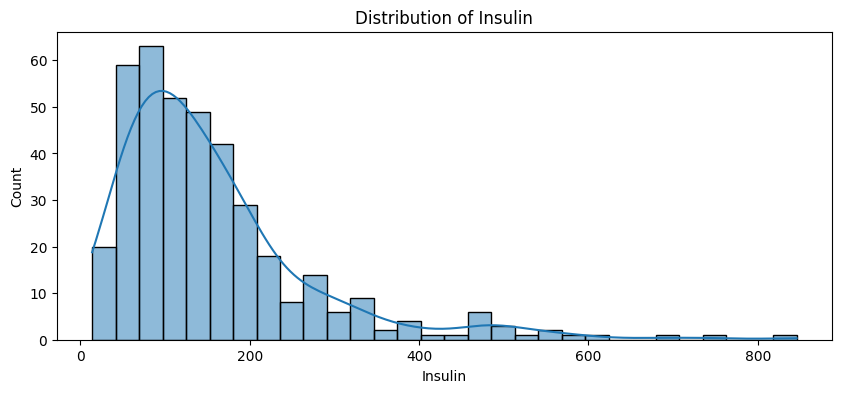

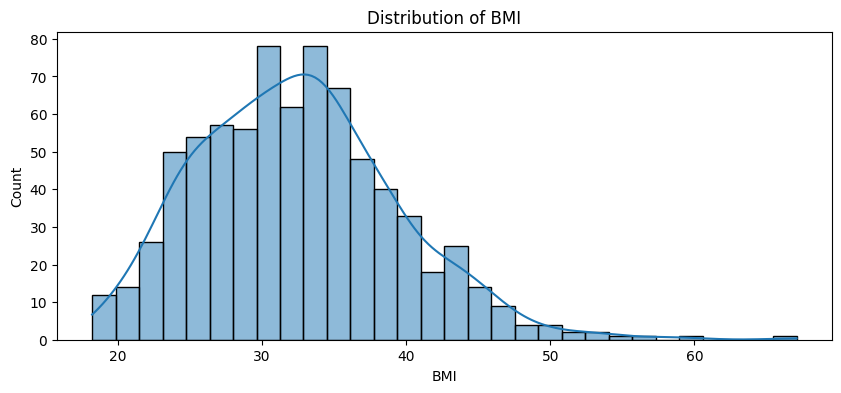

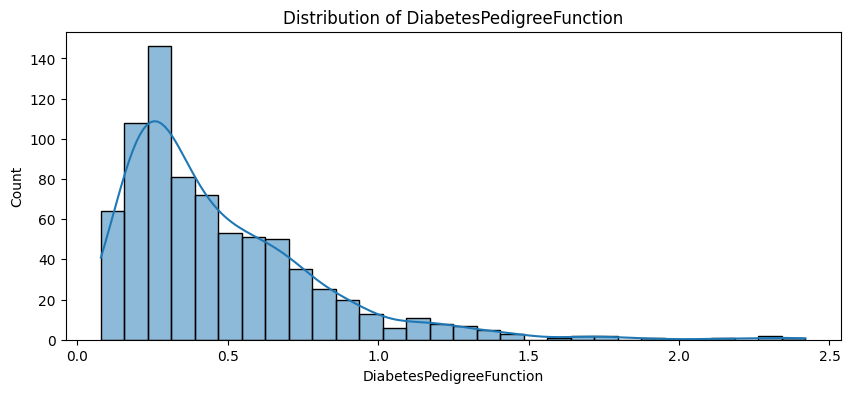

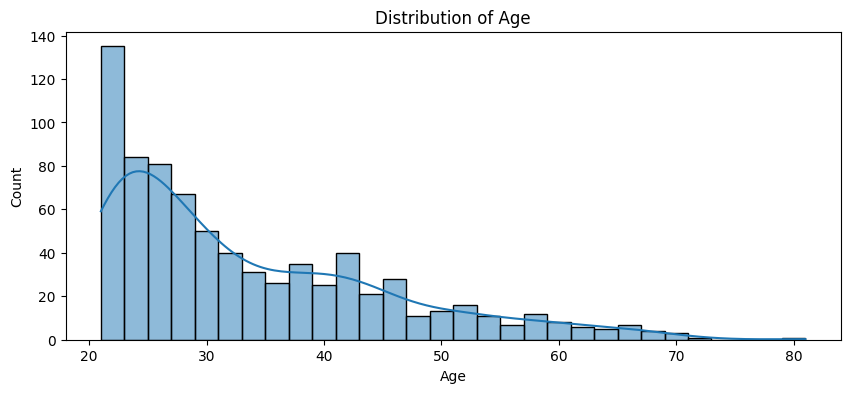

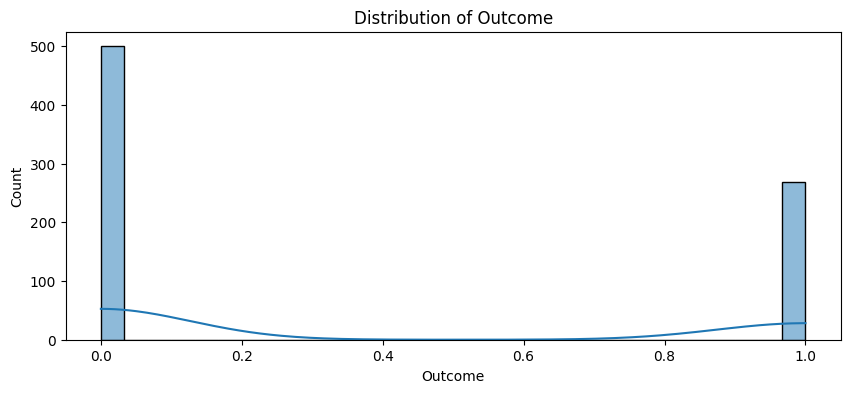

                          Missing Values  Percentage
Pregnancies                            0    0.000000
Glucose                                5    0.651042
BloodPressure                         35    4.557292
SkinThickness                        227   29.557292
Insulin                              374   48.697917
BMI                                   11    1.432292
DiabetesPedigreeFunction               0    0.000000
Age                                    0    0.000000
Outcome                                0    0.000000
185
Missing values after cleaning:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Summary statistics of cleaned data:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.0

<ipython-input-7-58165408843c>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned[column].fillna(data_cleaned[column].mean(), inplace=True)
<ipython-input-7-58165408843c>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [7]:

# Step 1: Analyze the data distribution for numerical features
numerical_features = data.select_dtypes(include=[np.number])

# Visualize distributions of numerical features
for column in numerical_features.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Step 2: Explore missing values
missing_info = data.isnull().sum()
missing_percentage = (missing_info / len(data)) * 100
missing_summary = pd.DataFrame({'Missing Values': missing_info, 'Percentage': missing_percentage})
print(missing_summary)

# Initialize data_cleaned as a copy of the original data
data_cleaned = data.copy()

# Step 3: Imputation strategy based on distribution
for column in numerical_features.columns:
    if data_cleaned[column].isnull().any():
        if data_cleaned[column].skew() > 1:  # Positive skew
            # Impute with median for positively skewed data
            data_cleaned[column].fillna(data_cleaned[column].median(), inplace=True)
        elif data_cleaned[column].skew() < -1:  # Negative skew
            # Impute with median for negatively skewed data
            data_cleaned[column].fillna(data_cleaned[column].median(), inplace=True)
        else:
            # For normally distributed data, impute with mean
            data_cleaned[column].fillna(data_cleaned[column].mean(), inplace=True)

# # Step 4: Handle outliers (using IQR method as an example)
# for column in numerical_features.columns:
#     Q1 = data_cleaned[column].quantile(0.25)
#     Q3 = data_cleaned[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     # Remove outliers (optional: adjust this step based on your requirements)
#     data_cleaned = data_cleaned[(data_cleaned[column] >= lower_bound) & (data_cleaned[column] <= upper_bound)]

# # Step 5: Impute categorical variables
# categorical_features = data_cleaned.select_dtypes(include=[object])
# for column in categorical_features.columns:
#     if data_cleaned[column].isnull().any():
#         # Impute with mode
#         data_cleaned[column].fillna(data_cleaned[column].mode()[0], inplace=True)

# Step 6: Verify the imputation
print("Missing values after cleaning:")
print(data_cleaned.isnull().sum())

# Optionally, display the cleaned DataFrame's summary statistics
print("Summary statistics of cleaned data:")
print(data_cleaned.describe(include='all'))

# data_cleaned = data.fillna(data.mean())
# print(data.columns)
# print(data.isnull().sum())
# print(f"Data shape after dropping missing values: {data_cleaned.shape}")
# print(data_cleaned.isnull().sum())
# print(data_cleaned.head())

In [8]:
# Check missing values for the insulin feature
missing_insulin = data['Insulin'].isnull().sum()
total_rows = len(data)
missing_percentage = (missing_insulin / total_rows) * 100

print(f"Missing values in 'insulin': {missing_insulin} ({missing_percentage:.2f}%)")

# Check unique values in the insulin feature
unique_values_insulin = data['Insulin'].unique()
print(f"Unique values in 'insulin': {unique_values_insulin}")

# Check the number of unique values
num_unique_values = len(unique_values_insulin)
print(f"Number of unique values in 'insulin': {num_unique_values}")
# Check the data type of the insulin feature
data_type_insulin = data_cleaned['Insulin'].dtype
print(f"Data type of 'insulin': {data_type_insulin}")




Missing values in 'insulin': 374 (48.70%)
Unique values in 'insulin': [ nan  94. 168.  88. 543. 846. 175. 230.  83.  96. 235. 146. 115. 140.
 110. 245.  54. 192. 207.  70. 240.  82.  36.  23. 300. 342. 304. 142.
 128.  38. 100.  90. 270.  71. 125. 176.  48.  64. 228.  76. 220.  40.
 152.  18. 135. 495.  37.  51.  99. 145. 225.  49.  50.  92. 325.  63.
 284. 119. 204. 155. 485.  53. 114. 105. 285. 156.  78. 130.  55.  58.
 160. 210. 318.  44. 190. 280.  87. 271. 129. 120. 478.  56.  32. 744.
 370.  45. 194. 680. 402. 258. 375. 150.  67.  57. 116. 278. 122. 545.
  75.  74. 182. 360. 215. 184.  42. 132. 148. 180. 205.  85. 231.  29.
  68.  52. 255. 171.  73. 108.  43. 167. 249. 293.  66. 465.  89. 158.
  84.  72.  59.  81. 196. 415. 275. 165. 579. 310.  61. 474. 170. 277.
  60.  14.  95. 237. 191. 328. 250. 480. 265. 193.  79.  86. 326. 188.
 106.  65. 166. 274.  77. 126. 330. 600. 185.  25.  41. 272. 321. 144.
  15. 183.  91.  46. 440. 159. 540. 200. 335. 387.  22. 291. 392. 178.
 127. 5

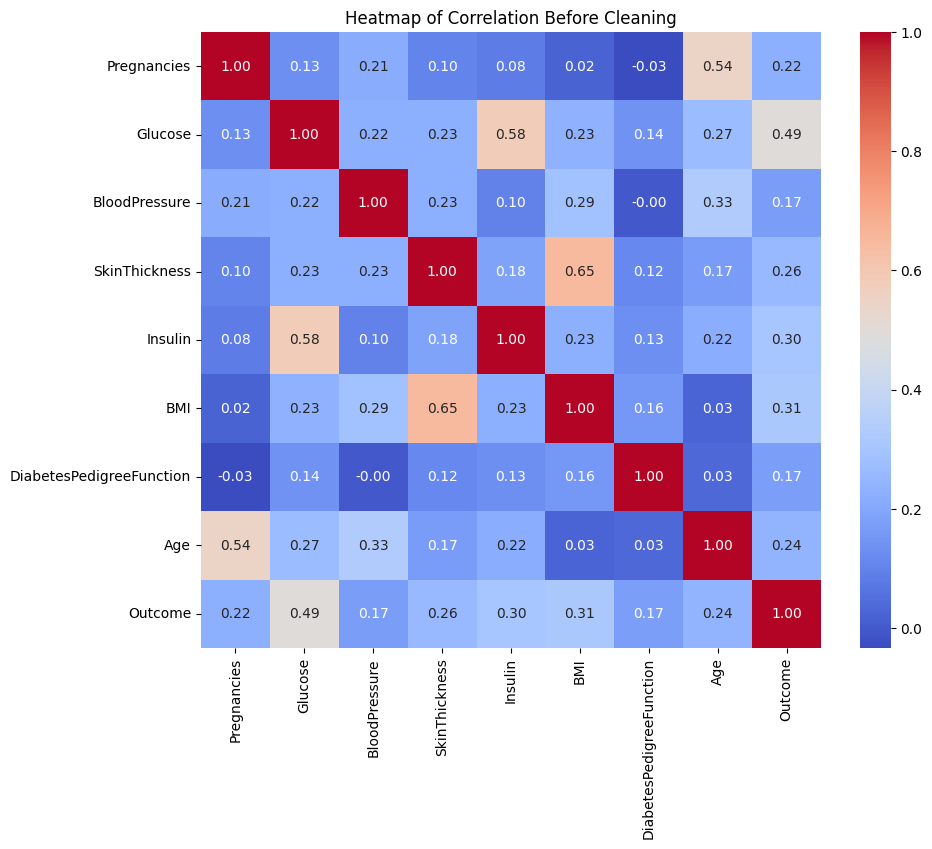

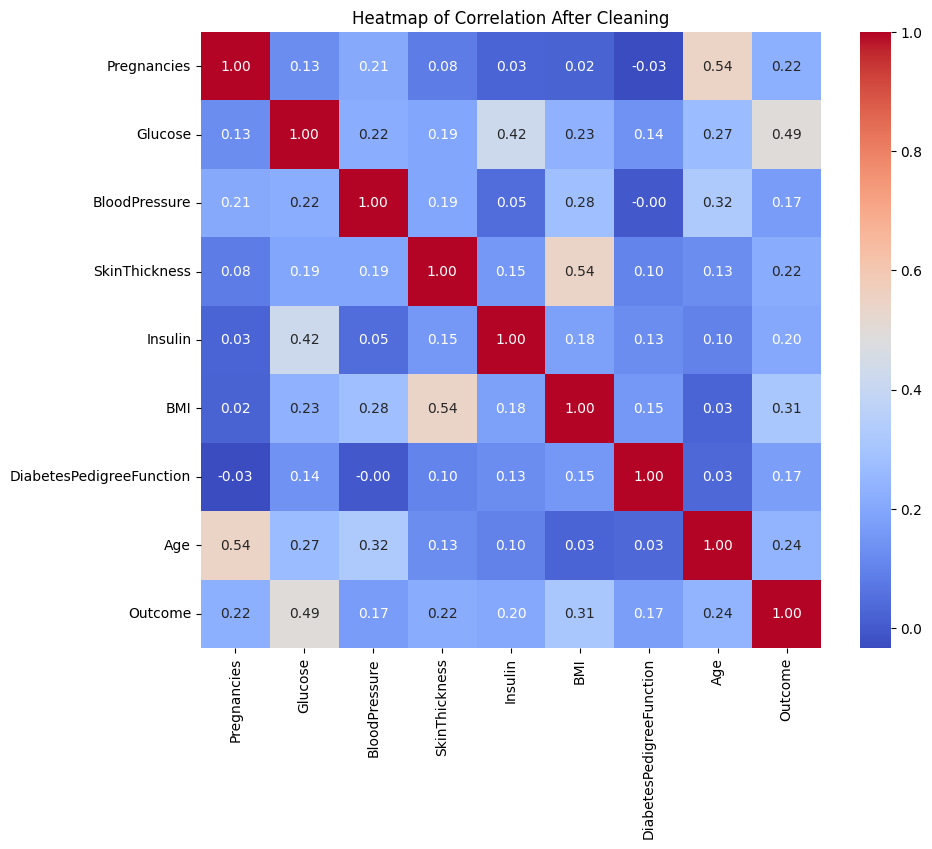

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Draw heatmap before cleaning
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(method='pearson'), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Correlation Before Cleaning')
plt.show()

# Draw heatmap after cleaning
plt.figure(figsize=(10, 8))
sns.heatmap(data_cleaned.corr(method='pearson'), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Correlation After Cleaning')
plt.show()


 From the heatmaps drawn, we can observe which features correlate strongly with the Outcome variable, informing our feature selection and model building.In this case we can see that Glucose, BMI and Age have higher correlation when compared to other features.

Standard scaling is used and the best 3 attributes as seen are Age, BMI, and Glucose as features in the context of predicting diabetes outcomes is based on their strong correlations with the target variable (Outcome)


The Nearest Neighbors method is a simple, instance-based learning algorithm where the model predicts the class of a data point based on the majority class of its K nearest neighbors in the feature space. The choice of K can significantly impact the model's performance. Scaling is crucial in KNN because the algorithm relies on distance calculations; features with larger ranges can disproportionately influence the outcome if they are not scaled. Standardizing features ensures that all attributes contribute equally to the distance metrics.

In [10]:
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = data_cleaned.drop('Outcome', axis=1)
y = data_cleaned['Outcome']

# Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the first few rows of the scaled data
print(X_scaled[:5])


[[ 6.39947260e-01  8.65108070e-01 -3.35182392e-02  6.65502121e-01
  -1.81541243e-01  1.66291742e-01  4.68491977e-01  1.42599540e+00]
 [-8.44885053e-01 -1.20616153e+00 -5.29859033e-01 -1.74633816e-02
  -1.81541243e-01 -8.52531177e-01 -3.65060778e-01 -1.90671905e-01]
 [ 1.23388019e+00  2.01581340e+00 -6.95305964e-01  8.08793628e-16
  -1.81541243e-01 -1.33283341e+00  6.04397318e-01 -1.05584152e-01]
 [-8.44885053e-01 -1.07465235e+00 -5.29859033e-01 -7.00428884e-01
  -5.40641767e-01 -6.34211980e-01 -9.20762614e-01 -1.04154944e+00]
 [-1.14185152e+00  5.03457822e-01 -2.68066914e+00  6.65502121e-01
   3.16565936e-01  1.54897999e+00  5.48490910e+00 -2.04963989e-02]]


In [11]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# Display the shapes of the split data
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")


X_train shape: (576, 8), X_test shape: (192, 8)


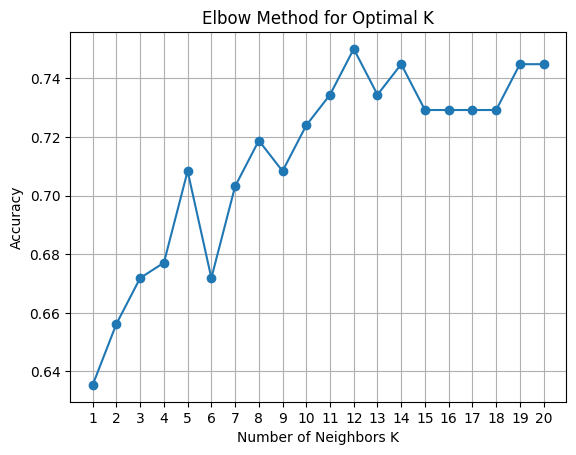

20


In [12]:
from sklearn.neighbors import KNeighborsClassifier

# Calculate accuracy for different K values
k_values = list(range(1, 21))
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

# Plot the results
plt.plot(k_values, scores, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()
print(max(k_values))


In [13]:


# Define your target variable
target_variable = 'Outcome'

# Calculate the correlation matrix
correlation_matrix = data_cleaned.corr(method='pearson')

# Get the correlation of features with the target variable
target_correlation = correlation_matrix[target_variable]

# Set a threshold for selecting features
threshold = 0.2  # You can adjust this value based on your needs

# Select features based on the absolute correlation with the target variable
selected_features = target_correlation[abs(target_correlation) > threshold]

# Print the selected features
print("Selected features based on Pearson correlation:")
print(selected_features)


Selected features based on Pearson correlation:
Pregnancies      0.221898
Glucose          0.492928
SkinThickness    0.215299
Insulin          0.203790
BMI              0.311924
Age              0.238356
Outcome          1.000000
Name: Outcome, dtype: float64


The three attributes—Glucose, BMI, and Age—were selected based on their high correlation with the target variable (Outcome). These features were identified as potentially having the most significant impact on the prediction of diabetes. Alternatively, one could consider features like BloodPressure or Insulin based on their domain significance.
Visualizing the target variable against these attributes in a 2D projection can help to observe the distribution and separability of classes, leading to insights about the data.


In [14]:
# Select three best attributes based on correlation
# Assuming 'Glucose', 'BMI', 'Age' are the best attributes for demonstration
selected_features = ['Glucose', 'BMI', 'Age']
X_selected = data_cleaned[selected_features]
X_selected_scaled = scaler.fit_transform(X_selected)


Here we choose k as 3, 5 and 10 as in case of 3 and 5 we have odd values of k whch helps us to avoid ties in binary classification problems. Also we test k as 10 as we have a relatively larger dataset for making the right decision


In [15]:
# Testing K values: 3, 5, 10
k_values_test = [3, 5, 10]
results = {}

for k in k_values_test:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    results[k] = accuracy
    print(f"Accuracy for K={k}: {accuracy:.4f}")


Accuracy for K=3: 0.6719
Accuracy for K=5: 0.7083
Accuracy for K=10: 0.7240


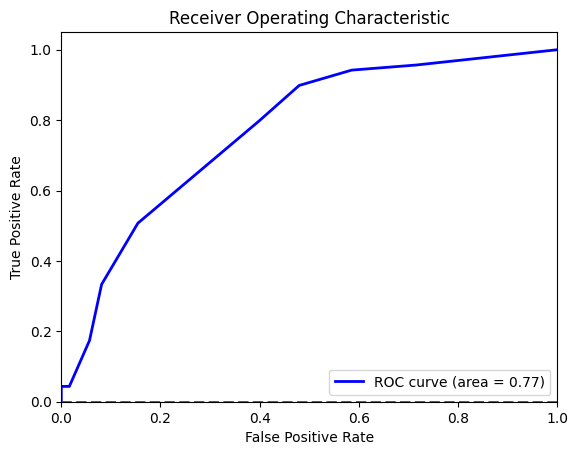

In [16]:
from sklearn.metrics import roc_curve, auc

# Use the best K from the previous results (let's assume K=10 is the best)
best_k = 10
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Get the probabilities for the positive class
y_probs = knn_best.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 0], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [17]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
y_pred_k3 = knn.fit(X_train, y_train).predict(X_test)
cm_k3 = confusion_matrix(y_test, y_pred_k3)
print(f"Confusion Matrix for K=3:\n{cm_k3}")
print(classification_report(y_test, y_pred_k3))

# Repeat for K=5 and K=10
y_pred_k5 = knn.fit(X_train, y_train).predict(X_test)
cm_k5 = confusion_matrix(y_test, y_pred_k5)
print(f"Confusion Matrix for K=5:\n{cm_k5}")
print(classification_report(y_test, y_pred_k5))

y_pred_k10 = knn.fit(X_train, y_train).predict(X_test)
cm_k10 = confusion_matrix(y_test, y_pred_k10)
print(f"Confusion Matrix for K=10:\n{cm_k10}")
print(classification_report(y_test, y_pred_k10))


Confusion Matrix for K=3:
[[104  19]
 [ 34  35]]
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       123
           1       0.65      0.51      0.57        69

    accuracy                           0.72       192
   macro avg       0.70      0.68      0.68       192
weighted avg       0.72      0.72      0.72       192

Confusion Matrix for K=5:
[[104  19]
 [ 34  35]]
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       123
           1       0.65      0.51      0.57        69

    accuracy                           0.72       192
   macro avg       0.70      0.68      0.68       192
weighted avg       0.72      0.72      0.72       192

Confusion Matrix for K=10:
[[104  19]
 [ 34  35]]
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       123
           1       0.65      0.51      0.57        69

    accuracy                      

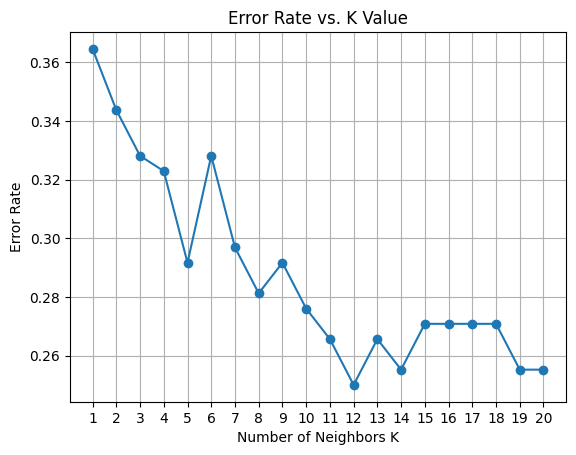

In [18]:
# Calculate error rate for each K
error_rate = [1 - score for score in scores]

# Plot error rate vs. K
plt.figure()
plt.plot(k_values, error_rate, marker='o')
plt.title('Error Rate vs. K Value')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Error Rate')
plt.xticks(k_values)
plt.grid()
plt.show()


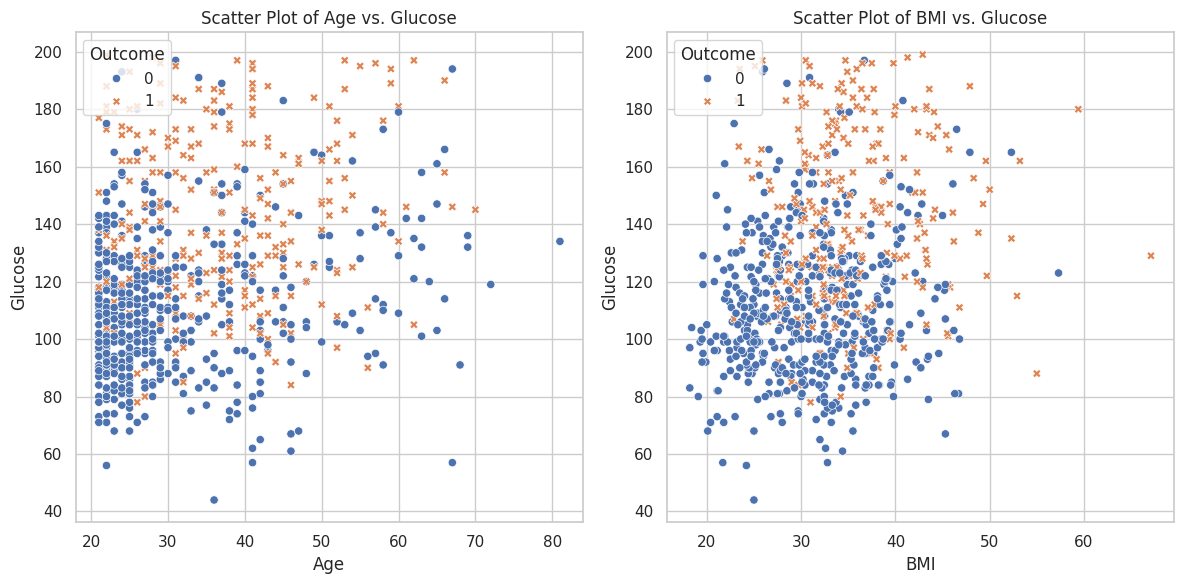

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure that the data is prepared
data_cleaned = data_cleaned[['Age', 'BMI', 'Glucose', 'Outcome']]

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a scatter plot for Age vs. Glucose
plt.figure(figsize=(12, 6))

# Scatter plot for Age vs. Glucose
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.scatterplot(data=data_cleaned, x='Age', y='Glucose', hue='Outcome', style='Outcome', palette='deep')
plt.title('Scatter Plot of Age vs. Glucose')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.legend(title='Outcome', loc='upper left')

# Scatter plot for BMI vs. Glucose
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.scatterplot(data=data_cleaned, x='BMI', y='Glucose', hue='Outcome', style='Outcome', palette='deep')
plt.title('Scatter Plot of BMI vs. Glucose')
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.legend(title='Outcome', loc='upper left')

# Show the plots
plt.tight_layout()
plt.show()


a. Describe the Nearest Neighbours method and why scaling is important in KNN.
Standard scaling is used and the best 3 attributes as seen are Age, BMI, and Glucose as features in the context of predicting diabetes outcomes is based on their strong correlations with the target variable (Outcome).
The Nearest Neighboors method is a simple, instance-based learning algorithm where the model predicts the class of a data point based on the majority class of its K nearest neighbhors in the feature space. The choice of K can significantly impact the model's performance. Scaling is crucial in KNN because the algorithm relies on distance calculations; features with larger ranges can disproportionately influence the outcome if they are not scaled. Standardizing features ensures that all attributes contribute equally to the distance metrics.


b. Explain what your criteria was for selecting the three attributes. What other 3 attribute can you choose? Visualizations of the target variable with three most significant attributes in a 2D projection, and write your observations in 4 - 5 lines in the same collab file
The three attributes—Glucose, BMI, and Age—were selected based on their high correlation with the target variable (Outcome). These features were identified as potentially having the most significant impact on the prediction of diabetes. Alternatively, one could consider features like BloodPressure or Insulin based on their domain significance.
Visualizing the target variable against these attributes in a 2D projection can help to observe the distribution and separability of classes, leading to insights about the data.

c. Explain Pearson's Correlation Coefficient, write the observations from heatmaps drawn.
Pearson's Correlation Coefficient measures the linear correlation between two variables, with a value ranging from -1 to 1. A value close to 1 indicates a strong positive correlation, -1 indicates a strong negative correlation, and 0 indicates no correlation. From the heatmaps drawn, we can observe which features correlate strongly with the Outcome variable, informing our feature selection and model building. Hence from heatmap drawn we can see that Glucose and BMI have the highest correlation when compared to other features.

d. Interpret and compare the results.
Here we choose k as 3, 5 and 10 as in case of 3 and 5 we have odd values of k which helps us to avoid ties in binary classification problems. Also we test k as 10 as we have a relatively larger dataset for making the right decision. Also we see that k = 12 has the highest accuracy using elbow method and also we see that error rate decreases as k value increases. Additionally we see from the scatter plot that that Glucose vs Age has more points near a specific glucose range as compared to the other scatter plot plotted.